In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from pylab import rcParams
import warnings
from matplotlib.colors import ListedColormap
from mlxtend.plotting import plot_decision_regions
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.datasets import make_circles

In [111]:
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)

<Axes: >

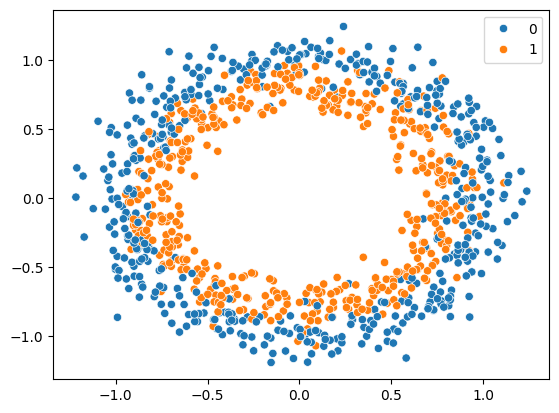

In [112]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 2 )

In [114]:
model = Sequential()

model.add(Dense(256, activation='relu', input_dim = 2)),
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 256)               768       
                                                                 
 dense_21 (Dense)            (None, 1)                 257       
                                                                 
Total params: 1025 (4.00 KB)
Trainable params: 1025 (4.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [115]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [116]:
callback = EarlyStopping(
    monitor= 'val_loss',
    min_delta= 0.00001,
    patience= 20,
    verbose= 1,
    mode= 'auto',
    baseline= None,
    restore_best_weights= False
)

In [117]:
history = model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=500, batch_size=20, verbose=1, callbacks=callback)

Epoch 1/500
40/40 [==============================] - 1s 8ms/step - loss: 0.6939 - accuracy: 0.4563 - val_loss: 0.6914 - val_accuracy: 0.4850
Epoch 2/500
40/40 [==============================] - 0s 4ms/step - loss: 0.6880 - accuracy: 0.5125 - val_loss: 0.6875 - val_accuracy: 0.4900
Epoch 3/500
40/40 [==============================] - 0s 3ms/step - loss: 0.6843 - accuracy: 0.5337 - val_loss: 0.6835 - val_accuracy: 0.5800
Epoch 4/500
40/40 [==============================] - 0s 3ms/step - loss: 0.6784 - accuracy: 0.5875 - val_loss: 0.6762 - val_accuracy: 0.6050
Epoch 5/500
40/40 [==============================] - 0s 4ms/step - loss: 0.6728 - accuracy: 0.6150 - val_loss: 0.6701 - val_accuracy: 0.6650
Epoch 6/500
40/40 [==============================] - 0s 3ms/step - loss: 0.6656 - accuracy: 0.7000 - val_loss: 0.6681 - val_accuracy: 0.6450
Epoch 7/500
40/40 [==============================] - 0s 3ms/step - loss: 0.6595 - accuracy: 0.6963 - val_loss: 0.6588 - val_accuracy: 0.7150
Epoch 8/500
4

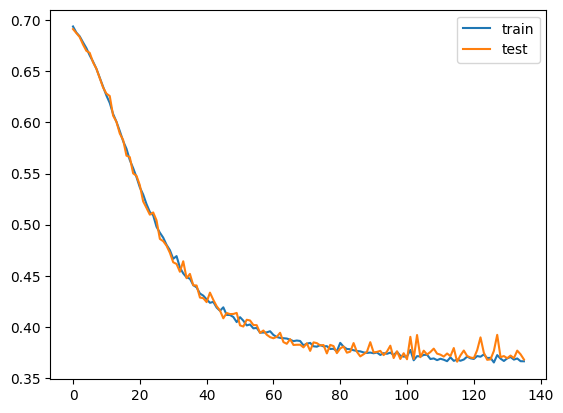

In [118]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 15s 2ms/step


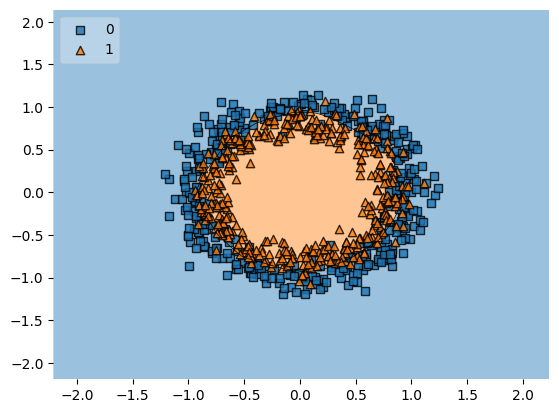

In [119]:
plot_decision_regions(X_train,y_train, clf=model, legend=2)
plt.show()